In [1]:
import tensorflow as tf

D:\Anconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = tf.keras.utils.image_dataset_from_directory('D:\\MachineCourse\\MachineLearnig\\NLP\\NLP-main\\testCode\\Deep_Learning\\data')

Found 305 files belonging to 2 classes.


In [4]:
data_iterator = data.as_numpy_iterator()

In [5]:
batch = data_iterator.next()

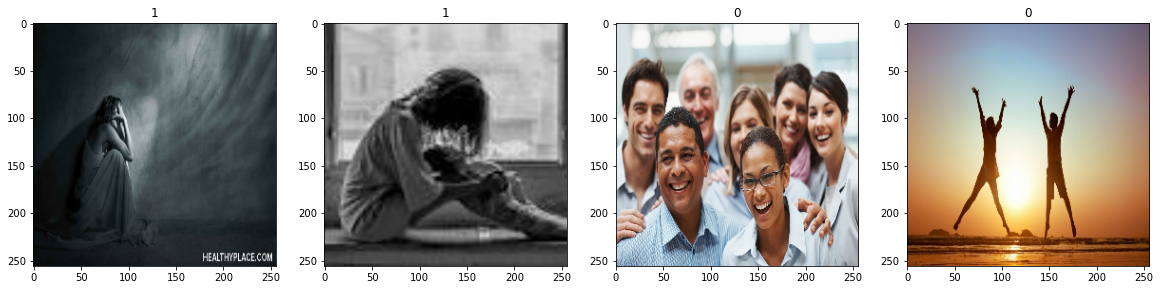

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [8]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [9]:
train= data.take(train_size)
val= data.skip(train_size).take(val_size)
test= data.skip(train_size+val_size).take(test_size)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [15]:
history = model.fit(train, epochs=5, validation_data=val)

Epoch 1/5
7/7 [==============================] - 29s 2s/step - loss: 15.5763 - accuracy: 0.6116 - val_loss: 1.6658 - val_accuracy: 0.7031
Epoch 2/5
7/7 [==============================] - 14s 2s/step - loss: 0.6959 - accuracy: 0.7232 - val_loss: 0.6178 - val_accuracy: 0.7656
Epoch 3/5
7/7 [==============================] - 13s 2s/step - loss: 0.4089 - accuracy: 0.8661 - val_loss: 0.2649 - val_accuracy: 0.9062
Epoch 4/5
7/7 [==============================] - 14s 2s/step - loss: 0.2015 - accuracy: 0.9598 - val_loss: 0.1218 - val_accuracy: 0.9531
Epoch 5/5
7/7 [==============================] - 14s 2s/step - loss: 0.0983 - accuracy: 0.9598 - val_loss: 0.0937 - val_accuracy: 0.9688


In [17]:
#Training dataset
#training_dataset=96 %

In [18]:
y_pred=model.predict(test)

1/1 [==============================] - 3s 3s/step


In [19]:
y_pred

array([[1.7487435e-04],
       [9.4155359e-01],
       [9.9877423e-01],
       [6.7060024e-01],
       [9.8817807e-01],
       [2.0462228e-06],
       [1.8292671e-09],
       [3.1237185e-03],
       [1.0000000e+00],
       [9.9998409e-01],
       [7.3706442e-01],
       [1.2674526e-03],
       [1.0000000e+00],
       [3.0538706e-06],
       [6.8045110e-01],
       [9.9728447e-01],
       [9.8026371e-01]], dtype=float32)

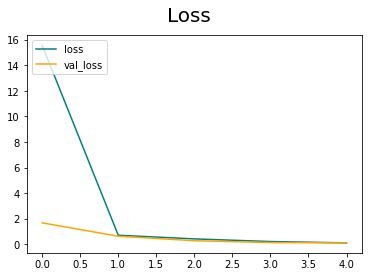

In [20]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

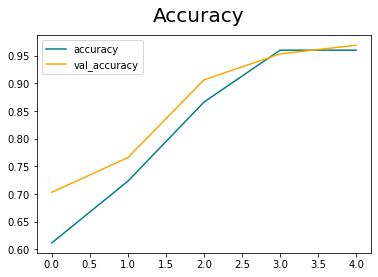

In [21]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
#Evalute Model

In [22]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [47]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 211ms/step


In [48]:
print(pre.result(),re.result(),acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [39]:
import cv2
img = cv2.imread('D:\\MachineCourse\\MachineLearnig\\NLP\\NLP-main\\testCode\\Deep_Learning\\data\\sad\\Crying-girl.jpg')
if img is not None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_tensor = tf.convert_to_tensor(img, dtype=tf.float32)
    resize = tf.image.resize(img_tensor, (256, 256))
else:
    print("Error loading image. Please check the file path.")



1/1 [==============================] - 0s 39ms/step
Predicted class is Sad


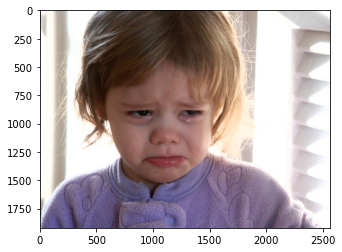

In [44]:
import numpy as np
y_pred= model.predict(np.expand_dims(resize/255, 0))
if y_pred > 0.5: 
    print(f'Predicted class is Sad')
    plt.imshow(img)
else:
    print(f'Predicted class is Happy')
    plt.imshow(img)